In [42]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from scipy.linalg import expm, eig, logm
from qiskit import QuantumCircuit, QuantumRegister, BasicAer, execute
from quantum_circuit.trotterization import trotter_circuit
from operators.pauli_hamiltonian import PauliHamiltonian
import matplotlib.pyplot as plt

In [34]:
# 2-site Heisenberg
T = 1
H = PauliHamiltonian([1., -0.5, -0.5], [{0: "Z", 1: "Z"}, {0: "X"}, {1: "X"}], n_sites=2)
exact = expm(-1j*H.matrix_form()*T)
spectrum, _ = eig(exact)
print(exact)
print(spectrum)

[[ 3.48123000e-01-0.76996349j  2.77555756e-17+0.349228j
  -2.77555756e-17+0.349228j   -1.92179306e-01+0.07150749j]
 [ 0.00000000e+00+0.349228j    3.48123000e-01+0.76996349j
  -1.92179306e-01-0.07150749j -2.77555756e-17+0.349228j  ]
 [ 0.00000000e+00+0.349228j   -1.92179306e-01-0.07150749j
   3.48123000e-01+0.76996349j -2.77555756e-17+0.349228j  ]
 [-1.92179306e-01+0.07150749j  0.00000000e+00+0.349228j
  -2.77555756e-17+0.349228j    3.48123000e-01-0.76996349j]]
[0.15594369+0.98776595j 0.54030231-0.84147098j 0.15594369-0.98776595j
 0.54030231+0.84147098j]


In [27]:
# Initialize Simulator
backend = BasicAer.get_backend('unitary_simulator')

In [28]:
# Construct Circuit
qr = QuantumRegister(2, 'qr')
circ = QuantumCircuit(qr)
circ = trotter_circuit(circ, qr, H, T, 10)
circ.draw()


In [44]:
job = execute(circ, backend)
trotterized_unitary = job.result().get_unitary(circ, decimals=3)
print(trotterized_unitary)

[[ 0.349-0.769j -0.039+0.348j -0.039+0.348j -0.191+0.073j]
 [ 0.039+0.348j  0.349+0.769j -0.191-0.073j  0.039+0.348j]
 [ 0.039+0.348j -0.191-0.073j  0.349+0.769j  0.039+0.348j]
 [-0.191+0.073j -0.039+0.348j -0.039+0.348j  0.349-0.769j]]


In [30]:
# Compare the exact unitary and trotterized unitary
print(exact-trotterized)

[[-6.44877000e-01-0.66996349j  2.77555756e-17+0.299228j
  -2.77555756e-17+0.299228j   -1.90179306e-01+0.07150749j]
 [ 0.00000000e+00+0.299228j   -6.44877000e-01+0.66996349j
  -1.90179306e-01-0.07150749j -2.77555756e-17+0.299228j  ]
 [ 0.00000000e+00+0.299228j   -1.90179306e-01-0.07150749j
  -6.44877000e-01+0.66996349j -2.77555756e-17+0.299228j  ]
 [-1.90179306e-01+0.07150749j  0.00000000e+00+0.299228j
  -2.77555756e-17+0.299228j   -6.44877000e-01-0.66996349j]]


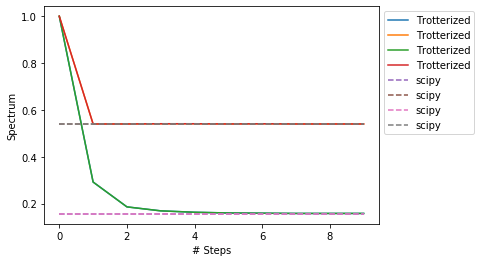

In [40]:
tr_spectra = []
for n_steps in range(10):
    # Construct Circuit
    qr = QuantumRegister(2, 'qr')
    circ = QuantumCircuit(qr)
    circ = trotter_circuit(circ, qr, H, T, n_steps)
    job = execute(circ, backend)
    eigvals, _ = eig(job.result().get_unitary(circ, decimals=3))
    tr_spectra.append(eigvals)
plt.plot(range(10), tr_spectra, label='Trotterized')
plt.plot(range(10), np.tile(np.reshape(spectrum, [1, -1]), [10, 1]), linestyle='--', label='scipy')
plt.xlabel("# Steps")
plt.ylabel("Spectrum")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [45]:
print(H.matrix_form())
print(logm(trotterized_unitary)/(-1j*T))

[[ 1.  -0.5 -0.5  0. ]
 [-0.5 -1.   0.  -0.5]
 [-0.5  0.  -1.  -0.5]
 [ 0.  -0.5 -0.5  1. ]]
[[ 0.99797023+0.00011096j -0.4977002 -0.05577675j -0.4977002 -0.05577675j
  -0.00256983-0.00017096j]
 [-0.4977002 +0.05577675j -0.99797023+0.00011096j  0.00256983-0.00017096j
  -0.4977002 +0.05577675j]
 [-0.4977002 +0.05577675j  0.00256983-0.00017096j -0.99797023+0.00011096j
  -0.4977002 +0.05577675j]
 [-0.00256983-0.00017096j -0.4977002 -0.05577675j -0.4977002 -0.05577675j
   0.99797023+0.00011096j]]
